In [164]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('POP.csv', delimiter = ',',parse_dates=['date'])

df.tail()

,realtime_start,value,date,realtime_end
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06
815,2019-12-06,330309.946,2019-12-01,2019-12-06


check if the columns realtime_start and realtime_end are always the same

In [155]:
def equality_check(date1, date2):
    assert date1 == date2,"Dates are not the same %s %s" % (str(date1), str(date2))

df['equality_check'] = df[["realtime_start", "realtime_end"]].apply( lambda x: equality_check(x.realtime_start, x.realtime_end), axis = 1)
df = df.drop(columns=['equality_check'])

In [156]:
df = df.drop(columns=['realtime_end', 'realtime_start'])
df.head()

,value,date
0,156309.0,1952-01-01
1,156527.0,1952-02-01
2,156731.0,1952-03-01
3,156943.0,1952-04-01
4,157140.0,1952-05-01


Reassign date as index of dataframe

In [157]:
df = df.set_index('date')
df.head()

,value
date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-01,156731.0
1952-04-01,156943.0
1952-05-01,157140.0


In [158]:
df.shape

(816, 1)

Text(0,0.5,'Population')

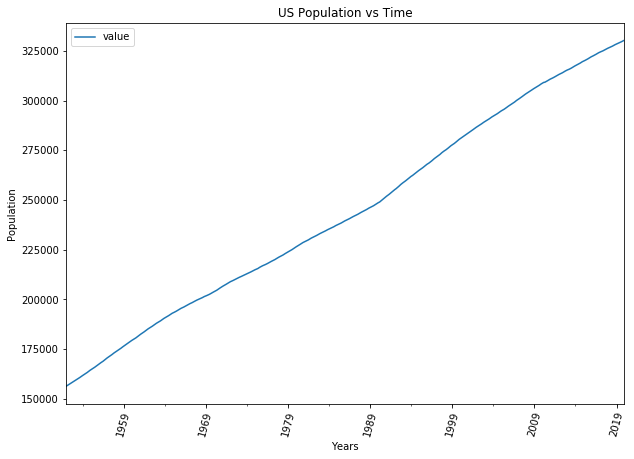

In [159]:
df.plot(figsize=(10,7), rot=75)
plt.title('US Population vs Time')
plt.xlabel('Years')
plt.ylabel('Population')

Text(0,0.5,'Population Mean')

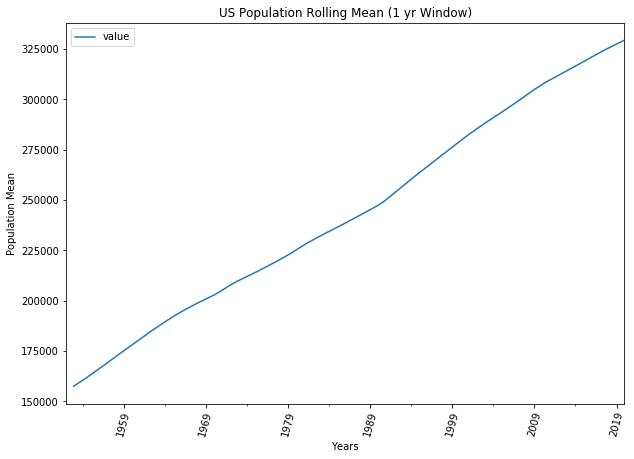

In [160]:
rollmean = df.rolling(12).mean()
#rollmean.head(15)
rollmean.plot(figsize=(10,7), rot=75)
plt.title('US Population Rolling Mean (1 yr Window)')
plt.xlabel('Years')
plt.ylabel('Population Mean')

Text(0,0.5,'Population Std')

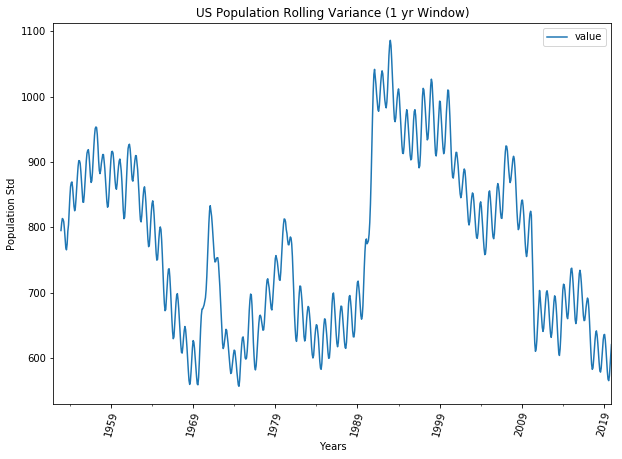

In [161]:
rollvar = df.rolling(12).std()

rollvar.plot(figsize=(10,7), rot=75)
plt.title('US Population Rolling Variance (1 yr Window)')
plt.xlabel('Years')
plt.ylabel('Population Std')

Note: Changes in variance

In [153]:
import scipy.stats as sp

y=np.array(df['value'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(df['value'].dropna()).index.values, dtype=float)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value)
print('p =', p_value)
print('std error = ', std_err)

('r = ', 0.9987721707047487)
('p =', 0.0)
('std error = ', 0.37215932834586474)


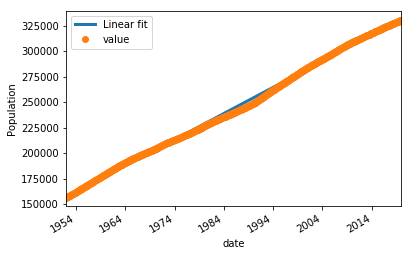

In [120]:
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
df['value'].dropna().plot(ax=ax,marker='o', ls='')
plt.ylabel('Population')
ax.legend();

<class 'pandas.core.series.Series'>
the coef (m) is: [[8.1401981e-14]] and the intercept (b) is [202858.97245688]


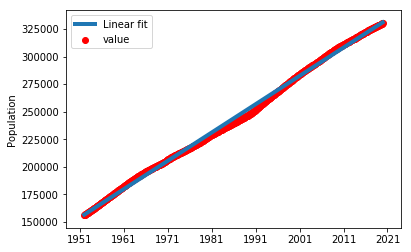

In [198]:
#Predictive Linear Regression
print type(df['date'])
x=pd.to_datetime(df['date'], format='%Y-%m-%d')
y=df['value'].values.reshape(-1, 1)

lm = linear_model.LinearRegression()
model = lm.fit(x.values.reshape(-1, 1),y)
coef = model.coef_
intercept = model.intercept_

print("the coef (m) is: %s and the intercept (b) is %s"  % (coef, intercept))

predictions = lm.predict(x.values.astype(float).reshape(-1, 1))

f, ax = plt.subplots(1, 1)
ax.plot(x, predictions,label='Linear fit', lw=4)
ax.scatter(x, y,label='value', marker='o', color='r')
plt.ylabel('Population')
ax.legend();

plt.show()

In [200]:
#let's use the predict method of our linear model object (lm) to predict the population in 2030 (US)
x_2030 = pd.to_datetime(pd.Series(data={'date':'2030-01-01'} , index=['date']), format='%Y-%m-%d')
print(x_2030)
#pred_2030 = lm.predict( np.array(np.datetime64(x_2030)).reshape(-1,1).astype(float))
pred_2030 = lm.predict( x_2030.values.reshape(-1,1).astype(float))
print(pred_2030*1000)

date   2030-01-01
dtype: datetime64[ns]
[[3.56990042e+08]]


## Predicted value for population

In [202]:
x_2030 = pd.to_datetime(pd.Series(data={'date':'2030-01-01'} , index=['date']), format='%Y-%m-%d')
x_ = x_2030.values.reshape(-1,1).astype(float)

y_pred = coef*x_ + intercept 
print(y_pred*1000)

[[3.56990042e+08]]
